## FIFO load balancer

In [1]:
import pandas as pd
import json
import os
import numpy as np

In [17]:
path = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO'
path2 = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance'

In [55]:
def extract_qs(path):
    qs = []
    for p in os.listdir(path):
        if p == "main.json":
            continue
        print(f"{path}/{p}")
        try:
            data = json.load(open(f"{path}/{p}",'r'))
            for q in data:
                q_data = json.loads(q['query'])
                for k in q_data.keys():
                    q[k] = q_data[k]
                q['ex_time'] = q['query_execution_end'] - q['query_execution_start']
                q['latency'] = q['query_execution_end'] - q['arrival_time']
                q['queue_wait_time'] = q['query_execution_start'] - q['queue_arrival_time']
                qs.append(q)
        except Exception as e:
            print(f"{path}/{p}")
    return qs
fifo = extract_qs(path)
qppBalance = extract_qs(path2)
len(fifo), len(qppBalance)

/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_1.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_5.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_6.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_8.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_2.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_3.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_4.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO/w_7.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/slow.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/fast3.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/fast4.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/med2.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/fast2.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/med3.json
/data/wikidata_0_1_10_v3_path_weight_loss/load_balance/

(1191, 5255)

In [54]:
fifo[0]

{'query': '{"ID": "http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE", "text": "PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 \\"180659\\" } ", "true_interval": "0"}',
 'start_time': 1705466079.4959524,
 'arrival_time': 1705466079.5066175,
 'queue_arrival_time': 1705466079.5613253,
 'query_execution_start': 1705466079.5627425,
 'query_execution_end': 1705466079.713499,
 'execution_time': 0.1507565975189209,
 'response': 'ok',
 'ID': 'http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE',
 'text': 'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 "180659" } ',
 'true_interval': '0',
 'ex_time': 0.1507565975189209,
 'latency': 0.20688152313232422}

In [20]:
print("Time outs")
print(f"FIFO LB Timeouts : {np.sum([1 for x in fifo if x['response'] == 'timed out'])}")
print(f"QPP LB Timeouts : {np.sum([1 for x in qppBalance if x['response'] == 'timed out'])}")

Time outs
FIFO LB Timeouts : 50
QPP LB Timeouts : 31


In [21]:
print("Good Queries")
print(f"FIFO LB Good Queries : {np.sum([1 for x in fifo if x['response'] == 'ok'])}")
print(f"QPP LB Good Queries : {np.sum([1 for x in qppBalance if x['response'] == 'ok'])}")

Good Queries
FIFO LB Good Queries : 1141
QPP LB Good Queries : 5224


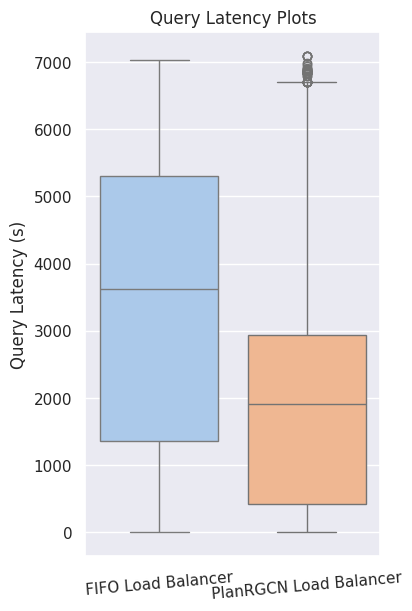

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

def plot_box_latency(qpp_lb, lb, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['latency'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
    
def plot_box_ex_time(qpp_lb, lb, figsize=(4,4)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['ex_time'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['ex_time'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.tick_params(axis='x', rotation=5)
    plt.show()
    
plot_box_latency(qppBalance, fifo)

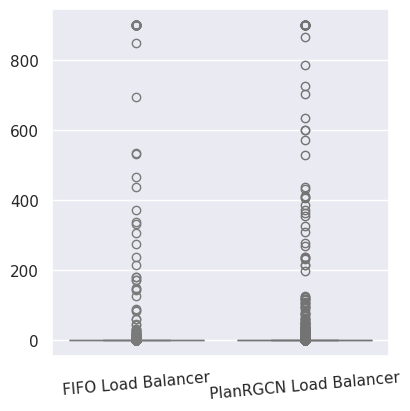

In [41]:
plot_box_ex_time(qppBalance, fifo)

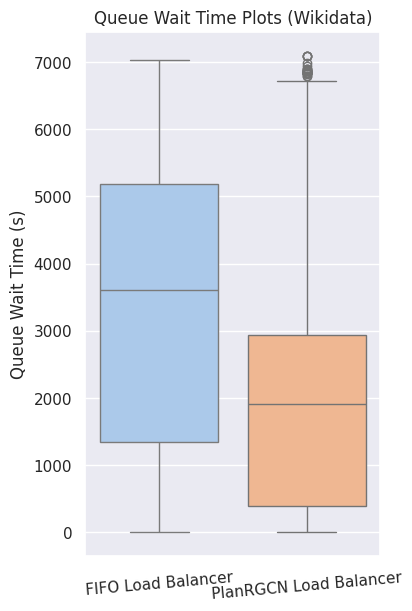

In [56]:
def plot_box_queu_wait_time(qpp_lb, lb, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['queue_wait_time'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['queue_wait_time'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (Wikidata)")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time(qppBalance, fifo)

In [58]:
print(f"Average Queue Wait Time QPP LB {np.mean([x['queue_wait_time'] for x in qppBalance])}")
print(f"Average Queue Wait Time FIFO LB {np.mean([x['queue_wait_time'] for x in fifo])}")

Average Queue Wait Time QPP LB 1816.0588650905327
Average Queue Wait Time FIFO LB 3352.3182545837285


In [59]:
def calculate_total_latency(qs):
    sum = 0
    for q in qs:
        sum += q['latency']
    return sum
lat_total_fifo = calculate_total_latency(fifo)
lat_total_qpp = calculate_total_latency(qppBalance)
lat_total_fifo, lat_total_qpp

(4045744.001056671, 9588517.202046871)

In [60]:
lat_total_fifo/len(fifo), lat_total_qpp/len(qppBalance)

(3396.9303115505213, 1824.6464704180535)

In [61]:
avg_fifo =lat_total_fifo/len(fifo)
avg_qpp = lat_total_qpp/len(qppBalance)
relative_impro = ((lat_total_qpp-lat_total_fifo)/lat_total_fifo)*100
relative_impro

137.00256861389482

In [62]:
((lat_total_fifo-lat_total_qpp)/lat_total_qpp)*100

-57.806364469023194

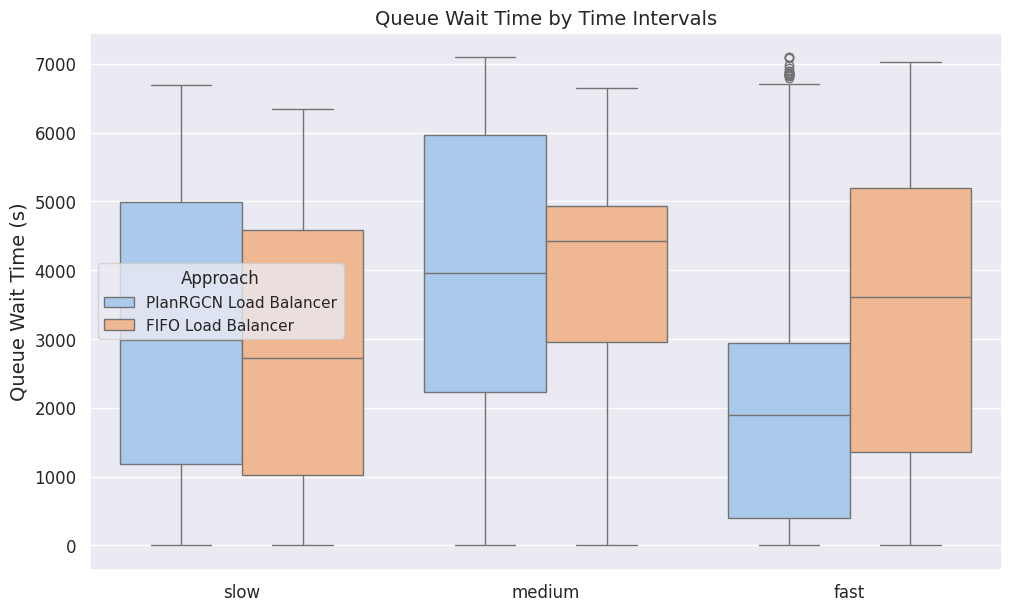

In [76]:
import pandas as pd

def plot_box_queu_wait_time_int(qpp_lb, lb, figsize=(4,6)):
    load_balancer = []
    que_w_time = []
    runtime_interval = []
    for q in qpp_lb:
        load_balancer.append('PlanRGCN Load Balancer')
        que_w_time.append(q['queue_wait_time'])
        match q['true_interval']:
            case '0':
                runtime_interval.append('fast')
            case '1':
                runtime_interval.append('medium')
            case '2':
                runtime_interval.append('slow')
    for q in lb:
        load_balancer.append('FIFO Load Balancer')
        que_w_time.append(q['queue_wait_time'])
        match q['true_interval']:
            case '0':
                runtime_interval.append('fast')
            case '1':
                runtime_interval.append('medium')
            case '2':
                runtime_interval.append('slow')
    df = pd.DataFrame.from_dict({'Approach': load_balancer, 'Runtime Interval':runtime_interval, 'queue wait time':que_w_time})
    figsize=(10,6)
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax = sns.boxplot(x='Runtime Interval',y='queue wait time',data=df,hue='Approach', ax =ax)
    ax.set_xlabel("")
    ax.set_title('Queue Wait Time by Time Intervals', fontsize=14)
    ax.set_ylabel("Queue Wait Time (s)", fontsize=14)
    
plot_box_queu_wait_time_int(qppBalance, fifo)